In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv("Desktop/mnist_train.csv",header=None)#Reads as dataframe,header=none for preventing 1st row cloumn to become headers
data1=np.array(data)#converting to numpy array


In [5]:
y=data1[:,0]
y.reshape(y.shape[0],1)
X=data1[:,1:]
m=X.shape[0]
n_x=X.shape[1]
X=X.T
n_y=10
Y=np.zeros((10,m))
for i in range(m):
    Y[y[i],i]+=1
#Train Input taken succesfully    

In [6]:
data=pd.read_csv("Desktop/mnist_test.csv",header=None)#Reads as dataframe,header=none for preventing 1st row cloumn to become headers
data1=np.array(data)#converting to numpy array


In [7]:
y_test=data1[:,0]
y_test.reshape(y_test.shape[0],1)
X_test=data1[:,1:]
m_test=X_test.shape[0]
n_x_test=X_test.shape[1]
X_test=X_test.T
n_y_test=10
Y_test=np.zeros((10,m))
for i in range(m_test):
    Y_test[y_test[i],i]+=1

In [8]:
def initialize_parameters(layer_dims):
    #Input dimensions of layers
    #Output-dictionary containing weights and bais for them
    parameters=dict()
    for i in range(len(layer_dims)-1):
        parameters["W"+str(i+1)]=np.random.randn(layer_dims[i+1],layer_dims[i])*0.01
        parameters["b"+str(i+1)]=np.zeros((layer_dims[i+1],1))
        assert(parameters["W"+str(i+1)]).shape==(layer_dims[i+1],layer_dims[i])
        assert(parameters["b"+str(i+1)]).shape==(layer_dims[i+1],1)
        
    return parameters 

In [9]:
def forward_prop(A_prev,W,b):
    #Calculates Z
    Z=np.dot(W,A_prev)+b
    assert(Z.shape==(W.shape[0],A_prev.shape[1]))
    return Z

In [10]:
def forward_act(A_prev,W,b,activation):
    #Input -Type of activation
    #Output-Activation
    Z=forward_prop(A_prev,W,b)
    if activation=='sigmoid':
        A=1/(1+np.exp(-Z))
    elif activation=='relu':
        A=np.maximum(0,Z)
    elif activation=='tanh':
        A=(np.exp(Z)-np.exp(-Z))/(np.exp(Z)+np.exp(-Z))
    elif activation=='softmax':
        A=np.exp(Z)/np.sum(np.exp(Z),axis=0,keepdims=True)
        
    assert(Z.shape==(W.shape[0],A_prev.shape[1]))    
    return A ,Z   

In [11]:
def L_layer_forward(X,parameters):
    l=int(len(parameters)/2)
    A_prev=X
    Z_caches=[]
    A_caches=[]
    A_caches.append(X)
    #caches.append(X)
    for i in range(l):
        if i==l-1:  
            AL,cache=forward_act(A_prev,parameters["W"+str(i+1)],parameters["b"+str(i+1)],'softmax')
        else:
            A,cache=forward_act(A_prev,parameters["W"+str(i+1)],parameters["b"+str(i+1)],'relu')
            A_prev=A
            A_caches.append(A_prev)
        Z_caches.append(cache)
    A_caches.append(AL)
    
   # assert(AL.shape==(n_y,m))
    return AL,Z_caches,A_caches

In [12]:
def cost(AL,Y):
    J=-1/m*np.sum(np.sum(np.log(AL)*Y,axis=0,keepdims=True),axis=1,keepdims=True)

    
    
    return J

In [13]:
def relu_backward(dA,Z):
    temp=(Z>0)
    dZ=dA*temp
    
    return dZ

In [14]:
def softmax_backward(dA,Z):
    dZ=dA*(np.exp(Z)/np.sum(np.exp(Z),axis=0,keepdims=True))*(1-np.exp(Z)/np.sum(np.exp(Z),axis=0,keepdims=True))
    
    return dZ

In [15]:
def grad(A_caches,Z_caches,parameters,AL,Y):#needs amendment,dW1 always zero
    grads=dict()
    l=int(len(parameters)/2)
    grads["dZ"+str(l)]=AL-Y
    for i in reversed(range(l)):
        grads["dW"+str(i+1)]=1/m*np.dot(grads["dZ"+str(i+1)],A_caches[i].T)
        grads["db"+str(i+1)]=1/m*np.sum(grads["dZ"+str(i+1)],axis=1,keepdims=True)
        if i==0:break
        dA=np.dot(parameters["W"+str(i+1)].T,grads["dZ"+str(i+1)])
        if i==l-1:
            grads["dZ"+str(i)]=softmax_backward(dA,Z_caches[i-1])
        else:
            grads["dZ"+str(i)]=relu_backward(dA,Z_caches[i-1])   
        
    return grads    

In [16]:
def update_paramters(parameters,grads,learning_rate):
    l=int(len(parameters)/2)
    for i in range(l):
        parameters["W"+str(i+1)]-=learning_rate*grads["dW"+str(i+1)]
        parameters["b"+str(i+1)]-=learning_rate*grads["db"+str(i+1)]
        
    return parameters    

In [19]:
def Train_model(X,Y,layer_dims,num_iter=1500,print_cost=False):
    costs=[]
    learning_rate=0.001
    parameters=initialize_parameters(layer_dims)
    for i in range(num_iter):
        AL,Z_caches,A_caches=L_layer_forward(X,parameters)
        J=cost(AL,Y)
        grads=grad(A_caches,Z_caches,parameters,AL,Y)
        parameters=update_paramters(parameters,grads,learning_rate)
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration "+str(i)+":"+str(J))
        if print_cost and i % 100 == 0:
            costs.append(J)
       
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
        
    
    return parameters

Cost after iteration 0:[[4.37356777]]
Cost after iteration 100:[[0.55450107]]
Cost after iteration 200:[[0.47661335]]
Cost after iteration 300:[[0.44275762]]
Cost after iteration 400:[[0.42254451]]
Cost after iteration 500:[[0.40869297]]
Cost after iteration 600:[[0.39842454]]
Cost after iteration 700:[[0.3904168]]
Cost after iteration 800:[[0.38394617]]
Cost after iteration 900:[[0.37857761]]
Cost after iteration 1000:[[0.37402951]]
Cost after iteration 1100:[[0.37011083]]
Cost after iteration 1200:[[0.36668872]]
Cost after iteration 1300:[[0.36366558]]
Cost after iteration 1400:[[0.36096994]]


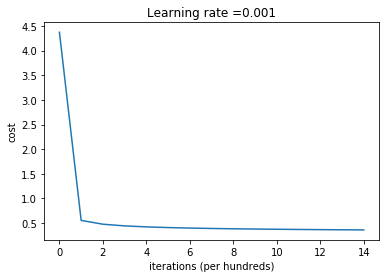

In [20]:
layer_dims=[n_x,150,n_y]
p=Train_model(X,Y,layer_dims,num_iter=1500,print_cost=True)


In [21]:
AL,Zcaches,Acaches=L_layer_forward(X,p)
temp=np.ndarray.max(AL,axis=0,keepdims=True)
AL=(AL>=temp)
t=0
for i in range(m):
    a=1
    for j in range(Y.shape[0]):
        if AL[j,i]!=Y[j,i]:
            a=0
            break
    if a==1:t+=1        
            
accuracy=t/(m)
print("Accuracy on training set is "+str(accuracy))

Accuracy on training set is 0.8939833333333334


In [22]:
AL,Zcaches,Acaches=L_layer_forward(X_test,p)
temp=np.ndarray.max(AL,axis=0,keepdims=True)
AL=(AL>=temp)
t=0
for i in range(m_test):
    a=1
    for j in range(Y_test.shape[0]):
        if AL[j,i]!=Y_test[j,i]:
            a=0
            break
    if a==1:t+=1        
            
accuracy=t/(m_test)
print("Accuracy on test set is "+str(accuracy))

Accuracy on test set is 0.8932


In [23]:
predict=np.zeros((1,m_test))
for i in range(m_test):
    for j in range(10):
        if AL[j,i]==True:
            predict[0,i]=j

In [32]:
def display(k):
    plt.imshow(X_test[:,k].reshape(28,28))
    print("You predicted it is :"+str(predict[0,k]))  
    print("It actually is:"+str(y_test[k]))

You predicted it is :4.0
It actually is:4


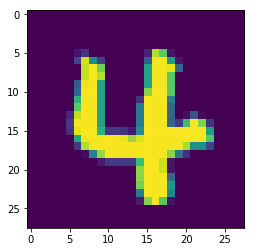

In [44]:
display(9099)